In [1]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import scipy.sparse as sps
from sklearn.feature_selection import SelectFromModel
import collections
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt
import itertools
from sklearn.neural_network import MLPClassifier

In [45]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.rcParams["figure.figsize"] = (8,8)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap, vmin = 0.0, vmax = 1.0)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
bins0 = [[-np.inf, 7.3710848960051774],
        [7.3710848960051774, 7.9191325350755957],
        [7.9191325350755957, 9.0152278132164323],
        [9.0152278132164323, 9.5632754522868506],
        [9.5632754522868506, np.inf]]
bnames0 = ['very bad', 'bad', 'average', 'good', 'very good']

bins5 = [[-np.inf, 7.3710848960051774],
        [7.3710848960051774, 7.9191325350755957],
        [7.9191325350755957, 9.0152278132164323],
        [9.0152278132164323, 9.9],
        [9.9, np.inf]]
bnames5 = ['very bad', 'bad', 'average', 'good', 'very good']

bins4 = [[-np.inf, 7.3710848960051774],
        [7.3710848960051774, 9.0152278132164323],
        [9.0152278132164323, 9.9],
        [9.9, np.inf]]
bnames4 = ['bad', 'average', 'good', 'very good']

bins3 = [[-np.inf, 8],
        [8,9.5],
        [9.5, np.inf]]
bnames3 = ['bad', 'average', 'good']

bins2 = [[-np.inf, 9],
        [9, np.inf]]

bnames2 = ['below', 'above']

In [4]:
binsCheat = [[-np.inf, 7],
        [7, 7.5],
        [7.5, 9.5],
        [9.5, 9.8],
        [9.9, np.inf]]
bnamesCheat = ['very bad', 'bad', 'average', 'good', 'very good']

In [5]:
def scoreLabel(x, bins):
    for i in range(len(bins)):
        if bins[i][0] < x <= bins[i][1]:
            return i

In [6]:
#featureMatrix = sps.load_npz('./Datasets_2/Regression_Features.npz')
featureMatrix = sps.load_npz('./Week7Dataset/Regression_Feat_Selection_VarThr.npz')
labels = np.load('./Week7Dataset/Regression_Labels.npz')['arr_0']

In [17]:
bins = bins5
bnames = bnames5
#fname = 'bin2classification.png'

#clsLabels = np.array([scoreLabelOneHot(i, bins) for i in labels])
clsLabels = np.array([scoreLabel(i, bins) for i in labels])

cnt = collections.Counter(clsLabels)
i = 0
for c in cnt:
    print bnames[i], 1.0 * cnt[c] / len(clsLabels)
    i+=1

very bad 0.203876923579
bad 0.127341526467
average 0.15977426747
good 0.260024628332
very good 0.248982654151


In [18]:
train, test, train_labels, test_labels = train_test_split(featureMatrix,clsLabels,test_size=.33,random_state=42)
train = MaxAbsScaler().fit_transform(train)
test = MaxAbsScaler().fit_transform(test)

In [19]:
train_stp1 = train.copy()
train_l_stp1 = train_labels.copy()
train_l_stp1[np.where(np.logical_and(train_l_stp1>=1, train_l_stp1<=3))] = 1
train_l_stp1[train_l_stp1 == 4] = 2

train_stp2 = train[np.where(np.logical_and(train_labels>=1, train_labels<=3))].copy()
train_l_stp2 = train_labels[np.where(np.logical_and(train_labels>=1, train_labels<=3))].copy() - 1

In [20]:
test_stp1 = test.copy()
test_l_stp1 = test_labels.copy()
test_l_stp1[np.where(np.logical_and(test_l_stp1>=1, test_l_stp1<=3))] = 1
test_l_stp1[test_l_stp1 == 4] = 2

test_stp2 = test[np.where(np.logical_and(test_labels>=1, test_labels<=3))].copy()
test_l_stp2 = test_labels[np.where(np.logical_and(test_labels>=1, test_labels<=3))].copy() - 1

In [21]:
#cls1 = OneVsRestClassifier(LinearSVC(class_weight='balanced', random_state=0))
#cls1 = OneVsRestClassifier(LogisticRegression(class_weight='balanced', random_state=0))
#cls1 = OneVsRestClassifier( MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10, 10), random_state=1, verbose=True))
cls1 = MLPClassifier(solver='adam', alpha=1e-5, max_iter = 40, validation_fraction=.1, hidden_layer_sizes=(100,),verbose=True)
cls1.fit(train_stp1, train_l_stp1)
cls1params = cls1.get_params()
np.save('cls1params',cls1params)

Iteration 1, loss = 0.75480480
Iteration 2, loss = 0.70074771
Iteration 3, loss = 0.68770098
Iteration 4, loss = 0.67662198
Iteration 5, loss = 0.66426760
Iteration 6, loss = 0.65113798
Iteration 7, loss = 0.63604286
Iteration 8, loss = 0.61866652
Iteration 9, loss = 0.59904577
Iteration 10, loss = 0.57750873
Iteration 11, loss = 0.55391794
Iteration 12, loss = 0.52907429
Iteration 13, loss = 0.50271024
Iteration 14, loss = 0.47601466
Iteration 15, loss = 0.44910026
Iteration 16, loss = 0.42264716
Iteration 17, loss = 0.39634229
Iteration 18, loss = 0.37160612
Iteration 19, loss = 0.34769475
Iteration 20, loss = 0.32468178
Iteration 21, loss = 0.30375478
Iteration 22, loss = 0.28425530
Iteration 23, loss = 0.26515439
Iteration 24, loss = 0.24870251
Iteration 25, loss = 0.23205149
Iteration 26, loss = 0.21756582
Iteration 27, loss = 0.20346051
Iteration 28, loss = 0.19130586
Iteration 29, loss = 0.17948362
Iteration 30, loss = 0.16871873
Iteration 31, loss = 0.15888782
Iteration 32, los

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [39]:
#cls2 = OneVsRestClassifier(LinearSVC(class_weight='balanced', random_state=0))
#cls2 = OneVsRestClassifier(LogisticRegression(class_weight='balanced', random_state=0))
cls2 = MLPClassifier(solver='adam', alpha=1e-5, max_iter = 100, validation_fraction=.1, hidden_layer_sizes=(100,),verbose=True)
cls2.fit(train_stp2, train_l_stp2)
cls2params = cls1.get_params()
np.save('cls2params',cls2params)

Iteration 1, loss = 0.98480555
Iteration 2, loss = 0.94486509
Iteration 3, loss = 0.92716068
Iteration 4, loss = 0.90603768
Iteration 5, loss = 0.87994797
Iteration 6, loss = 0.84947217
Iteration 7, loss = 0.81546115
Iteration 8, loss = 0.77836986
Iteration 9, loss = 0.73900065
Iteration 10, loss = 0.69711656
Iteration 11, loss = 0.65320133
Iteration 12, loss = 0.60831557
Iteration 13, loss = 0.56195850
Iteration 14, loss = 0.51846175
Iteration 15, loss = 0.47533088
Iteration 16, loss = 0.43542804
Iteration 17, loss = 0.39680602
Iteration 18, loss = 0.36168189
Iteration 19, loss = 0.33022388
Iteration 20, loss = 0.30105187
Iteration 21, loss = 0.27380931
Iteration 22, loss = 0.25010288
Iteration 23, loss = 0.22807770
Iteration 24, loss = 0.20861811
Iteration 25, loss = 0.19172569
Iteration 26, loss = 0.17631068
Iteration 27, loss = 0.16315758
Iteration 28, loss = 0.15072471
Iteration 29, loss = 0.13995951
Iteration 30, loss = 0.13039912
Iteration 31, loss = 0.12205216
Iteration 32, los

Normalized confusion matrix
[[ 0.52156033  0.4440883   0.03435138]
 [ 0.10353712  0.7047802   0.19168268]
 [ 0.02391822  0.51056967  0.46551211]]


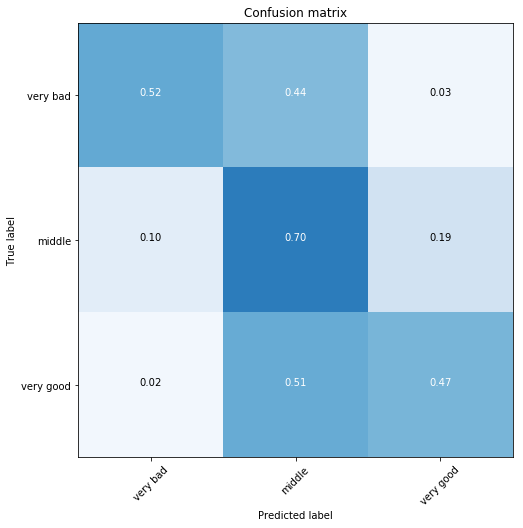

In [48]:
pred_stp1 = cls1.predict(test_stp1)
cm = confusion_matrix(test_l_stp1,pred_stp1).astype(float)
plot_confusion_matrix(cm.astype(np.int),['very bad', 'middle', 'very good'], normalize=True)
plt.savefig('NNexp1')
plt.show()

Normalized confusion matrix
[[ 0.19529366  0.71048317  0.09422317]
 [ 0.11305161  0.73772026  0.14922813]
 [ 0.05254157  0.68190024  0.26555819]]


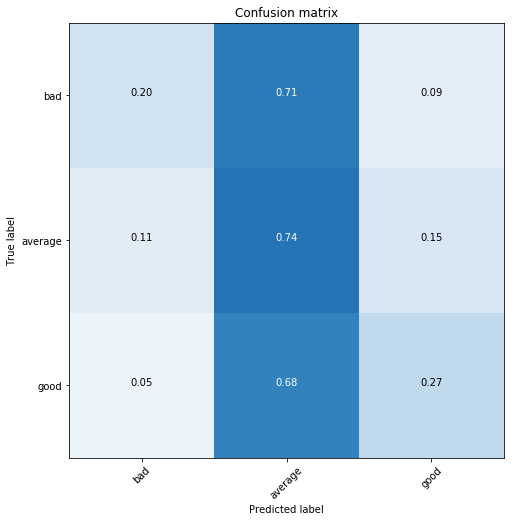

In [47]:
pred_stp2 = cls1.predict(test_stp2)
cm = confusion_matrix(test_l_stp2,pred_stp2).astype(float)
plot_confusion_matrix(cm.astype(np.int),['bad', 'average', 'good'], normalize=True)
plt.savefig('NNexp2')
plt.show()

Normalized confusion matrix
[[ 0.52156033  0.17949803  0.14357424  0.12101603  0.03435138]
 [ 0.19529366  0.20754171  0.23107339  0.27186807  0.09422317]
 [ 0.11305161  0.16006549  0.23327616  0.34437861  0.14922813]
 [ 0.05254157  0.10042755  0.18812352  0.39334917  0.26555819]
 [ 0.02391822  0.0568678   0.11785431  0.33584756  0.46551211]]


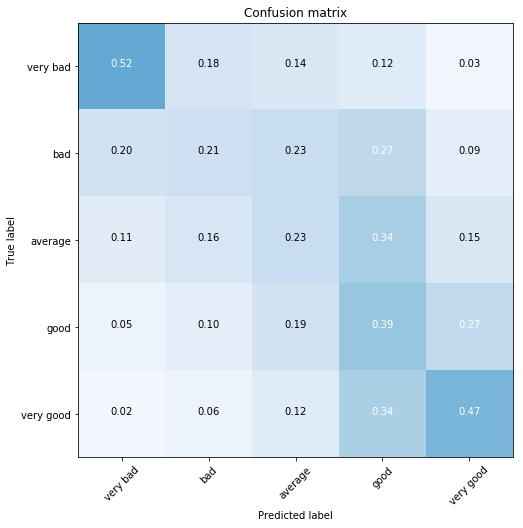

In [46]:
pred1 = cls1.predict(test_stp1)
midPredicted = test[np.where(pred1 == 1)]
pred2 = cls2.predict(midPredicted)
finPred = pred1*2
finPred[finPred == 2] = pred2 + 1

cm = confusion_matrix(test_labels, finPred).astype(float)
plot_confusion_matrix(cm.astype(np.int),['very bad', 'bad', 'average', 'good', 'very good'], normalize=True)
plt.savefig('NNOverall')
plt.show()